In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../..")

In [3]:
import torch
print(torch.cuda.is_available()) # True
print(torch.cuda.device_count()) # 1
print(torch.cuda.current_device()) # 0
print(torch.cuda.device(0)) # <torch.cuda.device at 0x7efce0b03be0>
print(torch.cuda.get_device_name(0)) # 'GeForce GTX 950M'

True
1
0
NVIDIA GeForce GTX 1080 Ti


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from librep.datasets.har.loaders import (
    MotionSense_BalancedView20HZ
)

2023-01-04 11:54:26.123720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 11:54:27.060678: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-04 11:54:27.060771: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-04 11:54:27.060782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [6]:
from librep.transforms.topo_ae import (
    TopologicalDimensionalityReduction,
    CustomTopoDimRedTransform
)
from librep.transforms import UMAP
from sklearn.manifold import TSNE
from experiments.Topological_ae.Experiment_utils import *
from librep.datasets.multimodal import TransformMultiModalDataset
from librep.transforms.fft import FFT
from tqdm.notebook import tqdm

In [7]:
import pickle
model_name = 'ConvolutionalAutoencoder_custom_dim3'
model_lambdas = [0.01, 0.1, 0, 1, 10, 100]
model_lambdas = [1]
model_startdim = 180
model_latentdim = 10
model_epochs = list(range(250, 5001, 250))
model_ids = list(range(0, 32))
pdata = {}
eval_models = ['RF', 'SVC', 'KNN']
eval_types = ['ACC', 'F1']
for e_m in eval_models:
    for e_t in eval_types:
        eval_obj = {}
        for m_e in model_epochs:
            eval_obj[m_e] = []
        pdata[e_m + '-' + e_t] = eval_obj
for id_used in tqdm(model_ids):
    for lambda_used in tqdm(model_lambdas):
        filename = 'data_eval/ConvolutionalAutoencoder_custom_dim3_{}_180-10_5000_{}.acc_f1.pkl'.format(lambda_used, id_used)
        filehandler = open(filename, 'rb')
        model_data = pickle.load(filehandler)
        filehandler.close()
        # print(model_data['model_lambda'], model_data['results'])
        
        filename = 'data/ConvolutionalAutoencoder_custom_dim3_{}_180-10_5000_{}.pkl'.format(lambda_used, id_used)
        filehandler = open(filename, 'rb')
        model_reducer = pickle.load(filehandler)
        filehandler.close()
        # print(model_reducer.history)
        # print(model_data['results'])
        for pair in model_data['results']:
            # epoch = pair[0]
            val_error = model_reducer.history['val_error'][pair[0]-1]
            metric_obj = pair[1]
            for metric_key in metric_obj:
                for m_val in metric_obj[metric_key]:
                    pdata[metric_key][pair[0]].append((val_error, m_val))
            #############VER#################
        # for epoch in model_epochs:
        #     val_error = model_reducer.history['val_error'][epoch-1]
        #     rf_acc = model_data
        # print(pdata)
        # assert 1==0

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
a = [1, 2]
b = [3, 4]
a+b

[1, 2, 3, 4]

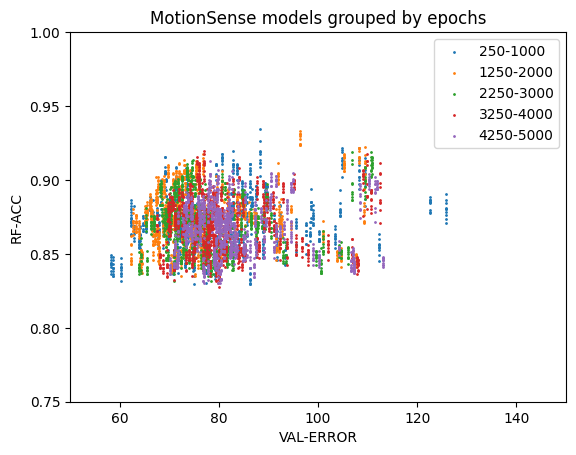

In [37]:
# print(model_reducer.history['val_error'])
# model_reducer.plot_training()
# model_data['results']
# len(pdata['RF-ACC'][2250])
keys_to_consider = model_epochs
keys_to_consider = [1000, 2000, 3000, 4000, 5000]
for mkey in keys_to_consider:
    x0 = [pair[0] for pair in pdata['RF-ACC'][mkey]]
    y0 = [pair[1] for pair in pdata['RF-ACC'][mkey]]
    x1 = [pair[0] for pair in pdata['RF-ACC'][mkey-250]]
    y1 = [pair[1] for pair in pdata['RF-ACC'][mkey-250]]
    x2 = [pair[0] for pair in pdata['RF-ACC'][mkey-500]]
    y2 = [pair[1] for pair in pdata['RF-ACC'][mkey-500]]
    x3 = [pair[0] for pair in pdata['RF-ACC'][mkey-750]]
    y3 = [pair[1] for pair in pdata['RF-ACC'][mkey-750]]
    x = x0 + x1 + x2 + x3 
    y = y0 + y1 + y2 + y3
    plt.scatter(x, y, label=str(mkey-750) + '-' + str(mkey), s=1)
    plt.ylim((0.75, 1))
    plt.xlim((50, 150))
    plt.legend()
    plt.title('MotionSense models grouped by epochs')
    plt.xlabel('VAL-ERROR')
    plt.ylabel('RF-ACC')

In [27]:
# pdata['RF-ACC'][250]

In [10]:
filename = 'data_eval/ConvolutionalAutoencoder_custom_dim3_0.01_180-10_5000_0.acc_f1.pkl'
filehandler = open(filename, 'rb')
data = pickle.load(filehandler)
print(data['results'][1])
filehandler.close()

(500, {'RF-ACC': [0.9009803921568628, 0.9009803921568628, 0.9019607843137255, 0.9019607843137255, 0.907843137254902, 0.9049019607843137, 0.907843137254902, 0.9009803921568628, 0.903921568627451, 0.8980392156862745], 'RF-F1': [0.901185828761331, 0.901270630142591, 0.9022598076500604, 0.9023214169579444, 0.9080119615745122, 0.9051018758390784, 0.9081805599506075, 0.9011492171870802, 0.9040893654799241, 0.8985282726434471], 'SVC-ACC': [0.9019607843137255], 'SVC-F1': [0.9026034835419132], 'KNN-ACC': [0.8607843137254902], 'KNN-F1': [0.8604010709913317]})


In [30]:
import matplotlib.pyplot as plt
import numpy as np
points = [(0, 0), (1, 1), (2, 3), (0, 3), (0, 4), (3, 1), (2, 4), (2, 2)]
print(points)
# points = sorted(points)
points.sort(key=lambda pair: pair[1])
print(points)

x = [point[0] for point in points]
y = [point[1] for point in points]
p_x = []
p_y = []
while len(points) > 0:
    p_x.append(points[0][0])
    p_y.append(points[0][1])
    limit_x = points[0][0]
    limit_y = points[0][1]
    points = list(filter(lambda p: p[0] > limit_x, points))
    print(points)
print(p_x, p_y)

[(0, 0), (1, 1), (2, 3), (0, 3), (0, 4), (3, 1), (2, 4), (2, 2)]
[(0, 0), (1, 1), (3, 1), (2, 2), (2, 3), (0, 3), (0, 4), (2, 4)]
[(1, 1), (3, 1), (2, 2), (2, 3), (2, 4)]
[(3, 1), (2, 2), (2, 3), (2, 4)]
[]
[0, 1, 3] [0, 1, 1]


In [12]:
print(points)
print(sorted(points, reverse=True))

[]
[]


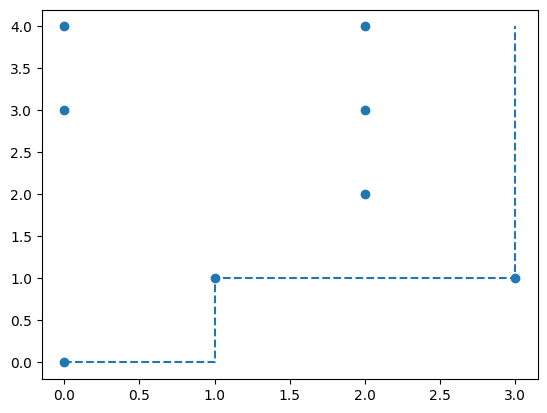

In [13]:
def plot_pareto(x, y, min_x=True, min_y=True):
    # Min y
    # Max x
    # if min_y
    plt.scatter(x, y)
    pareto_x = [0, 1, 1, 3, 3]
    pareto_y = [0, 0, 1, 1, 4]
    p_x = []
    p_y = []
    
    plt.plot(pareto_x, pareto_y, linestyle='--')
    
plot_pareto(x,y)

## Reading model

FileNotFoundError: [Errno 2] No such file or directory: 'data/ConvolutionalAutoencoder_custom_dim3_0_10_500_0.pkl'

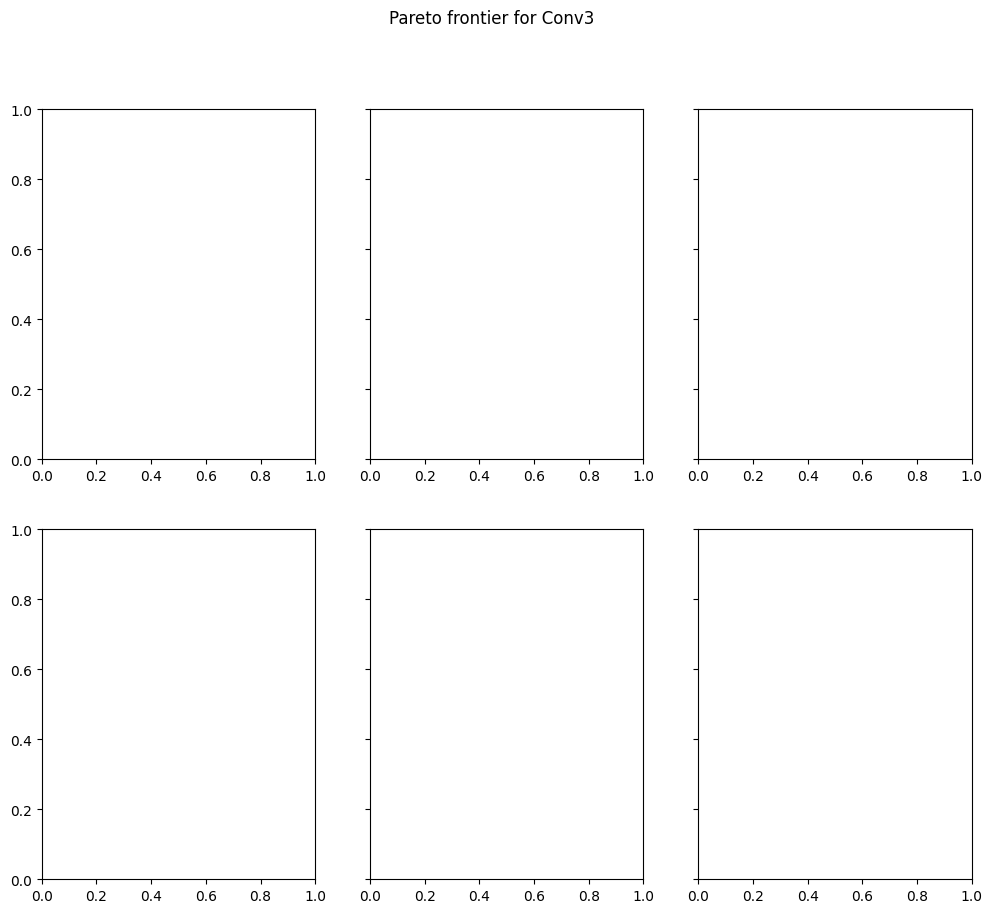

In [14]:
import pickle
import matplotlib.pyplot as plt
# Variables to reuse
save_ids = range(5)
model_name = 'ConvolutionalAutoencoder_custom_dim3'
model_dim = 10
model_epc = 500
model_lams = [0, 0.1, 0.01, 1, 10, 100]

all_rf_acc = []
all_rf_f1 = []
all_svc_acc = []
all_svc_f1 = []
all_knn_acc = []
all_knn_f1 = []
all_y = []
f, axs = plt.subplots(2, 3, sharey=True, figsize=(12, 10))
f.suptitle('Pareto frontier for Conv3')

for model_lam in model_lams:
    rf_acc = []
    rf_f1 = []
    svc_acc = []
    svc_f1 = []
    knn_acc = []
    knn_f1 = []
    recon_error = []
    for save_id in save_ids:
        filename = 'data/{}_{}_{}_{}_{}.pkl'.format(model_name, model_lam, model_dim, model_epc, save_id)
        filehandler = open(filename, 'rb')
        model = pickle.load(filehandler)
        filehandler.close()
        recon_error.append(model.train_recon_error[-1])
        all_y.append(model.train_recon_error[-1])
        # print(model.train_recon_error[-1])
        filename = 'data/{}_{}_{}_{}_{}.acc_f1.pkl'.format(model_name, model_lam, model_dim, model_epc, save_id)
        filehandler = open(filename, 'rb')
        evaluation = pickle.load(filehandler)
        filehandler.close()
        rf_acc.append(evaluation['RF-ACC'])
        all_rf_acc.append(evaluation['RF-ACC'])
        rf_f1.append(evaluation['RF-F1'])
        all_rf_f1.append(evaluation['RF-F1'])
        svc_acc.append(evaluation['SVC-ACC'])
        all_svc_acc.append(evaluation['SVC-ACC'])
        svc_f1.append(evaluation['SVC-F1'])
        all_svc_f1.append(evaluation['SVC-F1'])
        knn_acc.append(evaluation['KNN-ACC'])
        all_knn_acc.append(evaluation['KNN-ACC'])
        knn_f1.append(evaluation['KNN-F1'])
        all_knn_f1.append(evaluation['KNN-F1'])
    axs[0, 0].set_title('RF-ACC')
    axs[0, 0].set_xlim((0.75, 1))
    axs[0, 0].scatter(rf_acc, recon_error, label=str(model_lam))
    axs[1, 0].set_title('RF-F1')
    axs[1, 0].set_xlim((0.75, 1))
    axs[1, 0].scatter(rf_f1, recon_error, label=str(model_lam))
    axs[0, 1].set_title('SVC-ACC')
    axs[0, 1].set_xlim((0.75, 1))
    axs[0, 1].scatter(svc_acc, recon_error, label=str(model_lam))
    axs[1, 1].set_title('SVC-F1')
    axs[1, 1].set_xlim((0.75, 1))
    axs[1, 1].scatter(svc_f1, recon_error, label=str(model_lam))
    axs[0, 2].set_title('KNN-ACC')
    axs[0, 2].set_xlim((0.75, 1))
    axs[0, 2].scatter(knn_acc, recon_error, label=str(model_lam))
    axs[1, 2].set_title('KNN-F1')
    axs[1, 2].set_xlim((0.75, 1))
    axs[1, 2].scatter(knn_f1, recon_error, label=str(model_lam))

    axs[1, 2].legend(loc='center left', bbox_to_anchor=(1, 1))

plot_data = [
    {
        'axs_x': 0,
        'axs_y': 0,
        'title': 'RF-ACC',
        'Xs': all_rf_acc
    },
    {
        'axs_x': 1,
        'axs_y': 0,
        'title': 'RF-F1',
        'Xs': all_rf_f1
    },
    {
        'axs_x': 0,
        'axs_y': 1,
        'title': 'SVC-ACC',
        'Xs': all_svc_acc
    },
    {
        'axs_x': 1,
        'axs_y': 1,
        'title': 'SVC-F1',
        'Xs': all_svc_f1
    },
    {
        'axs_x': 0,
        'axs_y': 2,
        'title': 'KNN-ACC',
        'Xs': all_knn_acc
    },
    {
        'axs_x': 1,
        'axs_y': 2,
        'title': 'KNN-F1',
        'Xs': all_knn_f1
    }
]
for p_data in plot_data:
    maxX = True
    maxY = False
    Xs = p_data['Xs']
    Ys = all_y
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)

    '''Plotting process'''
    # plt.scatter(Xs,Ys)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    axs[p_data['axs_x'], p_data['axs_y']].plot(pf_X, pf_Y)
    if p_data['axs_x'] == 0:
        axs[p_data['axs_x'], p_data['axs_y']].set_xlabel('Accuracy value')
    else:
        axs[p_data['axs_x'], p_data['axs_y']].set_xlabel('F1 value')
    # print(pf_X, pf_Y)
    # plt.show()

In [ ]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)